# TripA 정리

In [ ]:
import pandas as pd

# 데이터셋 이름이 저장되어 있는 리스트
dataset_names = [f'TripA{i:02d}' for i in range(1, 33)]

# 빈 리스트를 생성합니다. 이곳에 각 데이터셋을 불러와 저장할 것입니다.
datasets = []

# Overview 데이터셋 불러오기
overview = pd.read_excel('/content/drive/MyDrive/23년도 2학기 학술제/11-29/Overview 수정.xlsx')

for col in overview.columns:
        new_col = col.split(' [')[0]  # ' [' 문자를 기준으로 문자열을 분리하고, 그 중 첫 번째 부분을 선택합니다.
        overview.rename(columns={col: new_col}, inplace=True)

for i, dataset_name in enumerate(dataset_names, start=1):
    # 데이터셋 불러오기
    df = pd.read_csv(f'/content/drive/MyDrive/23년도 2학기 학술제/11-29_변수처리/{dataset_name}.csv', encoding='cp949')

    # 'TripID' 열 추가
    df['TripID'] = i

    # Overview 데이터와 병합
    trip_info = overview[overview['Trip'] == dataset_name]  # 해당하는 Trip의 정보를 가져옵니다.
    for column in trip_info.columns:
        df[column] = trip_info[column].values[0]  # 가져온 정보를 df에 추가합니다.

    # 불러온 데이터셋을 리스트에 추가
    datasets.append(df)

# 모든 데이터셋을 하나로 합치기
total_data = pd.concat(datasets, ignore_index=True)


In [ ]:
import pandas as pd


# 속도를 m/s로 변환 (km/h를 m/s로 변환하려면 5/18을 곱해야 함)
total_data['Velocity [m/s]'] = total_data['Velocity']*5/18

# 각 시간 단위 동안의 이동 거리 계산 (속도*시간)
total_data['Distance [m]'] = total_data['Velocity [m/s]']*0.1

# 'Cumulative Distance [m]'는 실시간 주행 누적 거리

# 각 주행마다 누적 거리를 계산하기 위해 groupby를 사용
total_data['Cumulative Distance [m]'] = total_data.groupby('TripID')['Distance [m]'].cumsum()

# 'Cumulative Distance [m]' 열을 km 단위로 변환
total_data['Cumulative Distance [km]'] = total_data['Cumulative Distance [m]'] / 1000

total_data['use_power'] = 18.8 * abs(total_data['SoC'].iloc[0] - total_data['SoC']) / 100

# 이동거리 당 에너지 소비 계산
total_data['energy_per_distance'] = total_data['use_power'] / total_data['Cumulative Distance [km]']


total_data['energy_per_distance'].fillna(0, inplace=True)
# 'energy_per_distance' 값이 0인 경우 대체값 사용

total_data['energy_per_distance'] = total_data['energy_per_distance'].replace(0, 0.1279)

# 남은 주행 가능 거리 계산
total_data['remaining_distance'] = (18.8 * (total_data['SoC']/100)) / total_data['energy_per_distance']


In [ ]:
total_data['Note'] = total_data['Note'].fillna('No')
total_data['Battery Power'] = total_data['Battery Voltage'] * total_data['Battery Current']
total_data['Season'] = 1
total_data = total_data.drop(['Trip','Fan', 'Date', 'Battery State of Charge (Start)', 'Battery State of Charge (End)','Battery Voltage', 'Battery Current',
                              'Velocity [m/s]', 'Distance [m]', 'Cumulative Distance [m]', 'Cumulative Distance [km]', 'use_power', 'energy_per_distance'], axis=1)

columns_to_multiply = ['Using Battery State of Charge']
for column in columns_to_multiply:
    total_data[column] = total_data[column] * 100

# TripB 정리

In [ ]:
import pandas as pd

# 데이터셋 이름이 저장되어 있는 리스트
dataset_names = [f'TripB{i:02d}' for i in range(1, 39)]

# 빈 리스트를 생성합니다. 이곳에 각 데이터셋을 불러와 저장할 것입니다.
datasets = []

# Overview 데이터셋 불러오기
overview = pd.read_excel('/content/drive/MyDrive/23년도 2학기 학술제/11-29/Overview 수정.xlsx')

for col in overview.columns:
        new_col = col.split(' [')[0]  # ' [' 문자를 기준으로 문자열을 분리하고, 그 중 첫 번째 부분을 선택합니다.
        overview.rename(columns={col: new_col}, inplace=True)

for i, dataset_name in enumerate(dataset_names, start=1):
    # 데이터셋 불러오기
    df = pd.read_csv(f'/content/drive/MyDrive/23년도 2학기 학술제/11-29_변수처리/{dataset_name}.csv', encoding='cp949')

    # 'TripID' 열 추가
    df['TripID'] = i

    # Overview 데이터와 병합
    trip_info = overview[overview['Trip'] == dataset_name]  # 해당하는 Trip의 정보를 가져옵니다.
    for column in trip_info.columns:
        df[column] = trip_info[column].values[0]  # 가져온 정보를 df에 추가합니다.

    # 불러온 데이터셋을 리스트에 추가
    datasets.append(df)

# 모든 데이터셋을 하나로 합치기
total_dataB = pd.concat(datasets, ignore_index=True)


In [ ]:
import pandas as pd


# 속도를 m/s로 변환 (km/h를 m/s로 변환하려면 5/18을 곱해야 함)
total_dataB['Velocity [m/s]'] = total_dataB['Velocity']*5/18

# 각 시간 단위 동안의 이동 거리 계산 (속도*시간)
total_dataB['Distance [m]'] = total_dataB['Velocity [m/s]']*0.1

# 'Cumulative Distance [m]'는 실시간 주행 누적 거리

# 각 주행마다 누적 거리를 계산하기 위해 groupby를 사용
total_dataB['Cumulative Distance [m]'] = total_dataB.groupby('TripID')['Distance [m]'].cumsum()

# 'Cumulative Distance [m]' 열을 km 단위로 변환
total_dataB['Cumulative Distance [km]'] = total_dataB['Cumulative Distance [m]'] / 1000

total_dataB['use_power'] = 18.8 * abs(total_dataB['SoC'].iloc[0] - total_dataB['SoC']) / 100

# 이동거리 당 에너지 소비 계산
total_dataB['energy_per_distance'] = total_dataB['use_power'] / total_dataB['Cumulative Distance [km]']


total_dataB['energy_per_distance'].fillna(0, inplace=True)
# 'energy_per_distance' 값이 0인 경우 대체값 사용

total_dataB['energy_per_distance'] = total_dataB['energy_per_distance'].replace(0, 0.1279)

# 남은 주행 가능 거리 계산
total_dataB['remaining_distance'] = (18.8 * (total_dataB['SoC']/100)) / total_dataB['energy_per_distance']


In [ ]:
total_dataB['Note'] = total_dataB['Note'].fillna('No')
total_dataB['Battery Power'] = total_dataB['Battery Voltage'] * total_dataB['Battery Current']
total_dataB['Season'] = 0
total_dataB = total_dataB.drop(['Trip', 'Fan', 'Date', 'Battery State of Charge (Start)', 'Battery State of Charge (End)','Battery Voltage', 'Battery Current','Coolant Volume Flow +500',
                                'Velocity [m/s]', 'Distance [m]', 'Cumulative Distance [m]', 'Cumulative Distance [km]', 'use_power', 'energy_per_distance',
                                'Temperature Coolant Heater Inlet', 'Temperature Coolant Heater Outlet', 'Temperature Heat Exchanger Outlet', 'Temperature Defrost lateral left',
                                'Temperature Defrost lateral right', 'Temperature Defrost central', 'Temperature Defrost central left', 'Temperature Defrost central right', 'Temperature Footweel Driver',
                                'Temperature Footweel Co-Driver', 'Temperature Feetvent Co-Driver', 'Temperature Feetvent Driver', 'Temperature Head Co-Driver', 'Temperature Head Driver',
                                'Temperature Vent right', 'Temperature Vent central right', 'Temperature Vent central left', 'Temperature Vent right','Ambient Temperature Sensor','Temperature Vent right.1'], axis=1)

columns_to_multiply = ['Using Battery State of Charge']

for column in columns_to_multiply:
    total_dataB[column] = total_dataB[column] * 100

In [ ]:
same_columns = total_data.columns.equals(total_dataB.columns)

print(same_columns)


True


# 둘다 합치기

In [ ]:
df = pd.concat([total_data, total_dataB], ignore_index=True)


In [ ]:
df['Weather'] = df['Weather'].replace({'slightly cloudy': 'cloudy', 'dark, little rainy': 'rain', 'sunset':'sunrise', 'rainy': 'rain'})
df['Route/Area'] = df['Route/Area'].replace({'FTMRoute (2x)': 'FTMRoute', 'Munich North + Fast Charging': 'Munich North', 'FTMRoute reverse':'FTMRoute'})
df['Note'] = df['Note'].replace({'Sunday -> little traffic': 'little traffic',
                                                   'Sunday -> little traffic, (directly after previous trip)': 'little traffic',
                                                   'Open door at 37:10 and 42:00 for 30s':'No',
                                                   'FTMRoute (directly after previous trip)':'No',
                                                   'FTM Route (directly after previous trip)':'No',
                                                   'FTMRoute':'No',
                                                   "Fast Charging, '+70 kg":'+70 kg',
                                                   '+70kg':'+70 kg',
                                                   '+70 kg ':'+70 kg',
                                                   '+80 kg':'+70 kg',
                                                   '+60 kg ':'+70 kg'})

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.classes_ = np.array(['rain', 'cloudy', 'sunny', 'dark', 'sunrise'])

df['Weather'] = encoder.transform(df['Weather'])
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}

print(label_mapping)

{0: 'rain', 1: 'cloudy', 2: 'sunny', 3: 'dark', 4: 'sunrise'}


In [ ]:
encoder = LabelEncoder()
encoder.classes_ = np.array(['Munich East', 'Munich North', 'Munich Northeast', 'Munich South', 'Highway','FTMRoute'])

df['Route/Area'] = encoder.transform(df['Route/Area'])
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}

print(label_mapping)

{0: 'Munich East', 1: 'Munich North', 2: 'Munich Northeast', 3: 'Munich South', 4: 'Highway', 5: 'FTMRoute'}


In [ ]:
encoder = LabelEncoder()
encoder.classes_ = np.array(['No', 'little traffic', '+70 kg', '+ 160 kg', 'Rush Hour','Target Cabin Temperature changed '])
df['Note'] = encoder.transform(df['Note'])

# 인코딩된 라벨과 원래의 라벨 매핑
label_mapping = {index: label for index, label in enumerate(encoder.classes_)}

print(label_mapping)

{0: 'No', 1: 'little traffic', 2: '+70 kg', 3: '+ 160 kg', 4: 'Rush Hour', 5: 'Target Cabin Temperature changed '}


In [ ]:
df.columns

Index(['Time', 'Velocity', 'Elevation', 'Throttle', 'Motor Torque',
       'Longitudinal Acceleration', 'Regenerative Braking Signal ',
       'Battery Temperature', 'max. Battery Temperature', 'SoC',
       'displayed SoC', 'min. SoC', 'max. SoC', 'Heating Power CAN',
       'Requested Heating Power', 'AirCon Power', 'Heater Signal',
       'Ambient Temperature', 'Requested Coolant Temperature',
       'Heat Exchanger Temperature', 'Cabin Temperature Sensor', 'TripID',
       'Route/Area', 'Weather', 'Battery Temperature (Start)',
       'Battery Temperature (End)', 'Using Battery State of Charge',
       'Ambient Temperature (Start)', 'Target Cabin Temperature', 'Distance',
       'Duration', 'Note', 'remaining_distance', 'Battery Power', 'Season'],
      dtype='object')

In [ ]:
df = df.drop(['Distance', 'Duration'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063661 entries, 0 to 1063660
Data columns (total 35 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Time                           1063661 non-null  float64
 1   Velocity                       1063661 non-null  float64
 2   Elevation                      1063661 non-null  float64
 3   Throttle                       1063661 non-null  float64
 4   Motor Torque                   1063661 non-null  float64
 5   Longitudinal Acceleration      1063661 non-null  float64
 6   Regenerative Braking Signal    1063661 non-null  float64
 7   Battery Temperature            1063661 non-null  float64
 8   max. Battery Temperature       1063661 non-null  float64
 9   SoC                            1063661 non-null  float64
 10  displayed SoC                  1063661 non-null  float64
 11  min. SoC                       1063661 non-null  int64  
 12  max. SoC      

# light GBM 모델

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('remaining_distance', axis=1)
y = df['remaining_distance']

# 데이터를 훈련 데이터셋과 테스트 데이터셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 훈련 데이터에 대해 fit과 transform 수행
X_train = scaler.fit_transform(X_train)

# 테스트 데이터에 대해 transform 수행
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# LightGBM 모델 초기화
model = lgb.LGBMRegressor()

# 튜닝할 하이퍼파라미터 설정
param_grid = {
    'bagging_fraction': [0.8,0.7,0.9],
    'bagging_freq': [3,4,5],
    'feature_fraction': [0.8,0.7,0.9]
}

# GridSearchCV 객체 생성
grid = GridSearchCV(model, param_grid, cv=3)

# 모델 학습
grid.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best parameters found by grid search are:', grid.best_params_)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.227278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 567285, number of used features: 33
[LightGBM] [

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    # 튜닝시에는 달라지는 값
    'n_estimators': 500,
    'learning_rate': 0.02,

    # 빠르게 하기위한 파라미터
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_fraction': 0.7,
    'save_binary': True,
    'num_threads': -1,
    'verbose': 0, # 확정

    # 가장 중요한 파라미터
    'max_depth': 15, # 확정
    'num_leaves': 80, # 확정

    # 정확도를 높여주기위한 파라미터
    'max_bin': 255,
    'min_data_in_leaf': 43, #확정
    'metric': {'l2', 'l1'},

}

callbacks = [lgb.callback.early_stopping(5)]

print('Starting training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=400,
                valid_sets=[lgb_eval],
                callbacks=callbacks)



print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)


Starting training...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[228]	valid_0's l2: 31.4671	valid_0's l1: 1.5859
Starting predicting...
The rmse of prediction is: 5.609558639570914


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import KFold

# 데이터를 5개의 fold로 나눕니다.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 훈련 데이터를 LightGBM 데이터셋으로 변환합니다.
lgb_train = lgb.Dataset(X_train, y_train)

params = {
    # 튜닝시에는 달라지는 값
    'n_estimators': 500,
    'learning_rate': 0.02,

    # 빠르게 하기위한 파라미터
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_fraction': 0.7,
    'save_binary': True,
    'num_threads': -1,
    'verbose': 0,  # You can use '1' for some verbosity

    # 가장 중요한 파라미터
    'max_depth': 15,  # 확정
    'num_leaves': 80,  # 확정

    # 정확도를 높여주기위한 파라미터
    'max_bin': 255,
    'min_data_in_leaf': 43,  # 확정
    'metric': {'l2', 'l1'},
}

# 교차 검증을 사용해서 모델을 학습하고 성능을 평가합니다.
num_round = 100

# LightGBM 모델을 훈련합니다.
bst = lgb.train(
    params,
    lgb_train,
    num_boost_round=num_round,
    valid_sets=[lgb_train],
    feval=lambda preds, train_data: [('rmse', mean_squared_error(preds, train_data.get_label()), False)],
    early_stopping_rounds=10  # You can set a different value here
)

# 최적의 반복 횟수와 최소 RMSE를 출력합니다.
best_iteration = bst.best_iteration
best_score = bst.best_score['valid_0']['rmse']
print('Best number of iterations: ', best_iteration)
print('Best training score: ', best_score)


TypeError: ignored

In [ ]:
pip install --upgrade lightgbm

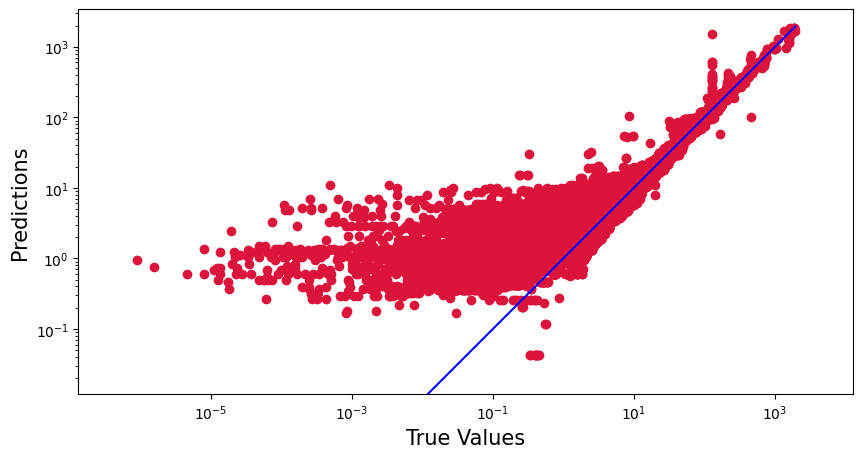

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
